# Mind the gap: investigation of income and wealth inequality

***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import seaborn as sns

## Import data

### World Inequality Database

In [4]:
w = pd.read_csv('../data/raw/WID_Data_w.csv', sep=';', skiprows=1).drop(['Percentile','Year'], axis=1)
region_col = w.columns.str.replace('.*\n.*\n.*\n','', regex=True)
# columns for regions
region_col

Index(['Africa', 'Americas', 'Asia', 'Asia (excl. Middle East)',
       'Australia and New Zealand', 'Caribbean', 'Central America',
       'Central Asia', 'East Africa', 'East Asia', 'Eastern Europe', 'Europe',
       'European Union', 'Latin America', 'MENA', 'Middle Africa',
       'Middle East', 'North Africa', 'North America',
       'North America & Oceania', 'Oceania',
       'Oceania (excl. Australia and New Zealand)', 'Other East Asia',
       'Other Latin America', 'Other MENA', 'Other North America & Oceania',
       'Other Russia & Central Asia', 'Other South & South-East Asia',
       'Other Sub-Saharan Africa', 'Other Western Europe',
       'Russia & Central Asia', 'South Africa', 'South America', 'South Asia',
       'South-East Asia', 'South & South-East Asia', 'Sub-Saharan Africa',
       'West Africa', 'West Asia', 'Western Europe', 'World'],
      dtype='object')

In [15]:
def prepdata(filename:str, value_name:str, text='.*\n.*\n.*\n')->pd.DataFrame:
    
    '''For file from World Inequality Database, ,load file from file name, remove text from col name, 
    remove market value col, melt and set value col name'''
    
    path = '../data/raw/' + filename + '.csv' 
    df = pd.read_csv(path, sep=';', skiprows=1).drop(['Percentile'], axis=1)
    df.columns = df.columns.str.replace(text,'', regex=True)
    df_col = df.columns[~df.columns.str.contains('Year|at market', regex=True)]
    df = df.melt(id_vars=['Year'], value_vars=df_col, var_name='country', value_name=value_name)
    return df

# Income

In [6]:
# Equal-split pre-tax mean income
pretax_mean_income = prepdata('WID_Data_pretax_mean_income', 'pretax_mean_income')

In [7]:
# Equal-split post-tax mean income
posttax_mean_income = prepdata('WID_Data_posttax_mean_income', 'posttax_mean_income')

In [8]:
# Equal-split pre-tax median income
pretax_median_income = prepdata('WID_Data_pretax_median_income', 'pretax_median_income')

In [9]:
# Equal-split post-tax median income
posttax_median_income = prepdata('WID_Data_posttax_median_income', 'posttax_median_income')

In [10]:
# Equal-split pre-tax gini income
pretax_gini_income = prepdata('WID_Data_pretax_gini_income', 'pretax_gini_income')

In [11]:
# Equal-split post-tax gini income
posttax_gini_income = prepdata('WID_Data_posttax_gini_income', 'posttax_gini_income')

# Wealth

In [12]:
# Equal-split mean wealth
mean_wealth = prepdata('WID_Data_mean_wealth', 'mean_wealth')

In [13]:
# Equal-split median wealth
median_wealth = prepdata('WID_Data_median_wealth', 'median_wealth')

In [14]:
# Equal-split gini wealth
gini_wealth = prepdata('WID_Data_gini_wealth', 'gini_wealth')

# Trade

In [16]:
trade = pd.read_csv('../data/raw/GDP_trade.csv', skiprows=4)
trade = trade.rename(columns={'Country Name':'country'}).\
drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 67'], axis=1)
trade = trade.melt(id_vars='country',var_name='Year', value_name='trade')
trade.Year = trade.Year.astype('int64')
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  16758 non-null  object 
 1   Year     16758 non-null  int64  
 2   trade    10693 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 392.9+ KB


# Merge Data

In [17]:
data = pretax_mean_income.merge(posttax_mean_income, how='outer', on=['Year', 'country']).\
merge(pretax_median_income, how='outer',on=['Year', 'country']).\
merge(posttax_median_income, how='outer',on=['Year', 'country']).\
merge(pretax_gini_income, how='outer',on=['Year', 'country']).\
merge(posttax_gini_income, how='outer',on=['Year', 'country']).\
merge(mean_wealth, how='outer', on=['Year', 'country']).\
merge(median_wealth, how='outer',on=['Year', 'country']).\
merge(gini_wealth, how='outer',on=['Year', 'country']).\
merge(trade, how='left', on=['Year', 'country'])

In [19]:
# Add mean/median ratio
data['pretax_income_mean_median_ratio'] = data.pretax_mean_income/data.pretax_median_income
data['posttax_income_mean_median_ratio'] = data.posttax_mean_income/data.posttax_median_income
data['wealth_mean_median_ratio'] = data.mean_wealth/data.median_wealth
# Add post/pre raio
data['mean_posttax_pretax_income_ratio'] = data.posttax_mean_income/data.pretax_mean_income
data['median_posttax_pretax_income_ratio'] = data.posttax_median_income/data.pretax_median_income
data['posttax_pretax_gini_income_ratio'] = data.posttax_gini_income/data.pretax_gini_income

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19521 entries, 0 to 19520
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                19521 non-null  int64  
 1   country                             19521 non-null  object 
 2   pretax_mean_income                  19482 non-null  float64
 3   posttax_mean_income                 19381 non-null  float64
 4   pretax_median_income                19482 non-null  float64
 5   posttax_median_income               19381 non-null  float64
 6   pretax_gini_income                  19482 non-null  float64
 7   posttax_gini_income                 4229 non-null   float64
 8   mean_wealth                         19350 non-null  float64
 9   median_wealth                       19350 non-null  float64
 10  gini_wealth                         19377 non-null  float64
 11  trade                               17640

In [21]:
data.describe()

,Year,pretax_mean_income,posttax_mean_income,pretax_median_income,posttax_median_income,pretax_gini_income,posttax_gini_income,mean_wealth,median_wealth,gini_wealth,trade,pretax_income_mean_median_ratio,posttax_income_mean_median_ratio,wealth_mean_median_ratio,mean_posttax_pretax_income_ratio,median_posttax_pretax_income_ratio,posttax_pretax_gini_income_ratio
count,19521.00000,19482.000000,19381.000000,19482.000000,19381.000000,19482.000000,4229.000000,19350.000000,19350.000000,19377.000000,17640.000000,19482.000000,19381.000000,19350.000000,19381.000000,19381.000000,4229.000000
mean,2008.00000,23300.292392,23487.012648,9756.873312,11541.082788,0.664178,0.536945,57573.139181,9250.032691,0.906384,58.214404,2.802476,2.235873,10.819813,1.011954,1.247749,0.837564
std,7.78908,14389.582050,14081.580023,10431.293369,10646.185559,0.081876,0.108025,53566.389295,20467.910490,0.091320,27.622412,0.846508,0.455841,4.847632,0.045407,0.162887,0.098870
min,1995.00000,218.214700,218.214700,134.202100,157.366900,0.307445,0.025816,-54433.168400,-12778.500500,0.539493,0.020999,0.892857,0.998409,1.418440,0.618250,0.333333,0.065316
25%,2001.00000,19617.287600,19932.696800,5906.070225,8409.882200,0.628780,0.469518,40086.535100,3270.232900,0.860445,46.220722,2.210913,1.955979,5.405406,1.000000,1.101693,0.796328
50%,2008.00000,22224.651700,22373.432600,7439.465400,9578.430400,0.677105,0.594295,56028.543300,4101.391200,0.936640,53.768141,2.737154,2.254333,12.500000,1.000000,1.248565,0.807464
75%,2015.00000,23894.799600,24135.195600,8312.376000,10206.545600,0.746030,0.602156,62813.822000,5204.359200,0.964393,57.125139,3.757342,2.669591,14.285714,1.026884,1.390728,0.901881
max,2021.00000,226775.326700,226775.326700,164195.716000,184439.023400,0.781373,0.744154,632472.971000,227873.105500,1.059585,437.326715,4.545455,3.695096,17.904947,2.347907,2.686837,1.876377


In [46]:
cor=data.loc[(~data.country.isin(region_col))].query('Year==2021').drop(['Year','country'], axis=1).corr('kendall')

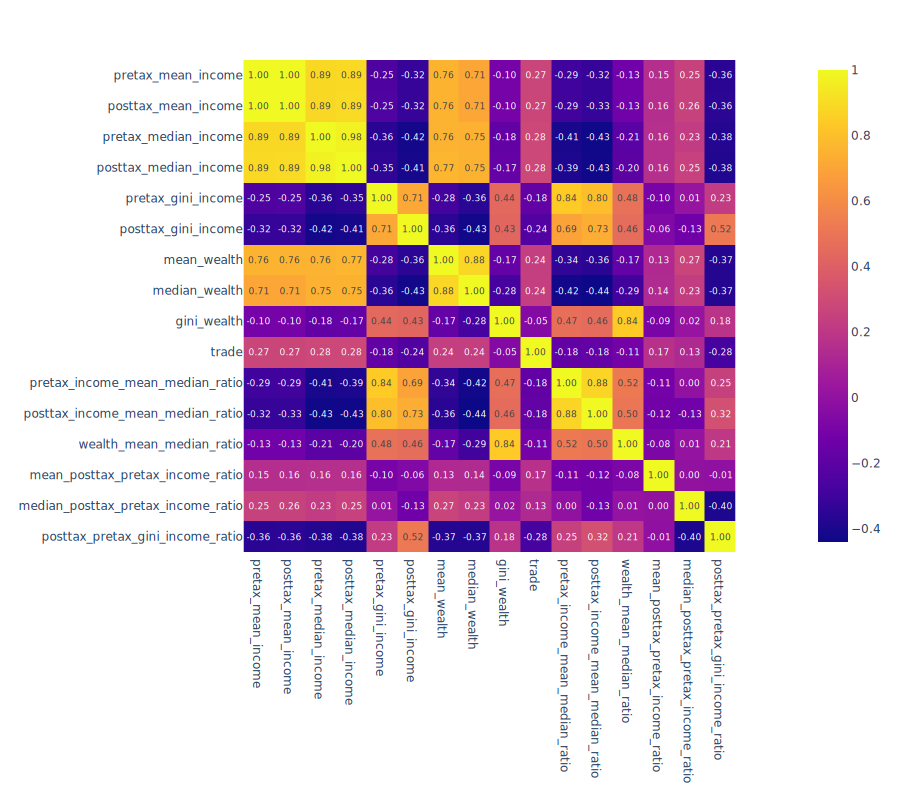

In [47]:
fig = px.imshow(cor, text_auto='.2f' , width=900, height=800)
fig.show('svg')

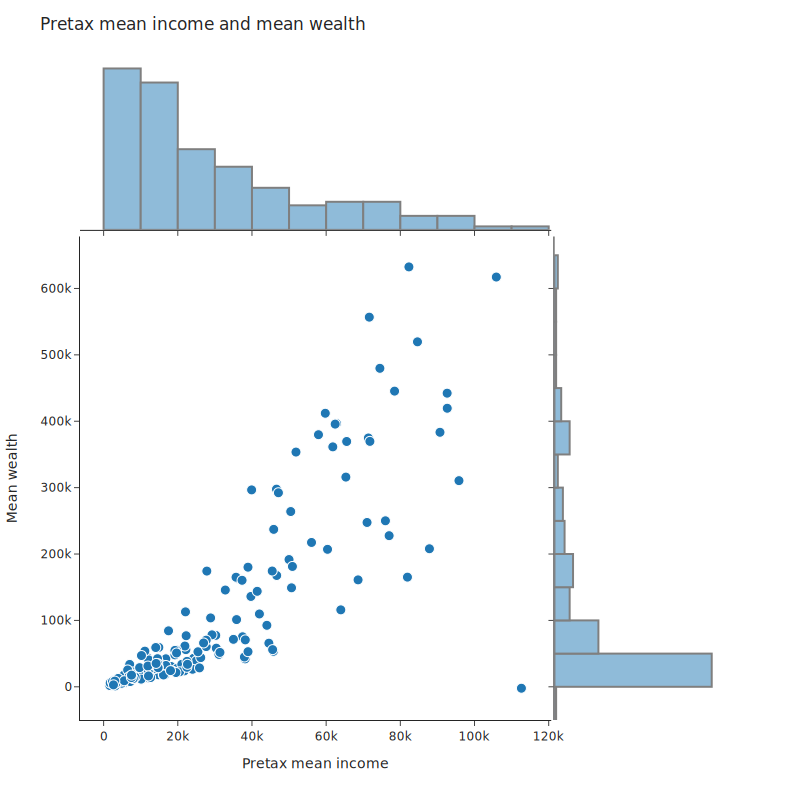

In [68]:
fig = px.scatter(data.loc[(~data.country.isin(region_col))].query('Year==2021'), x="pretax_mean_income", 
                 y="mean_wealth", hover_name="country", marginal_x='histogram', marginal_y='histogram', 
                template='simple_white', width=800, height=800)
fig.update_layout(showlegend=False, yaxis_title='Mean wealth',xaxis_title='Pretax mean income', 
                  title='Pretax mean income and mean wealth')
fig.update_traces(marker=dict(size=10,line=dict(width=1, color='white')), selector=dict(type='scatter'))
fig.update_traces(marker=dict(line=dict(width=2,color='black')), selector=dict(type='histogram'))

fig.show('svg')

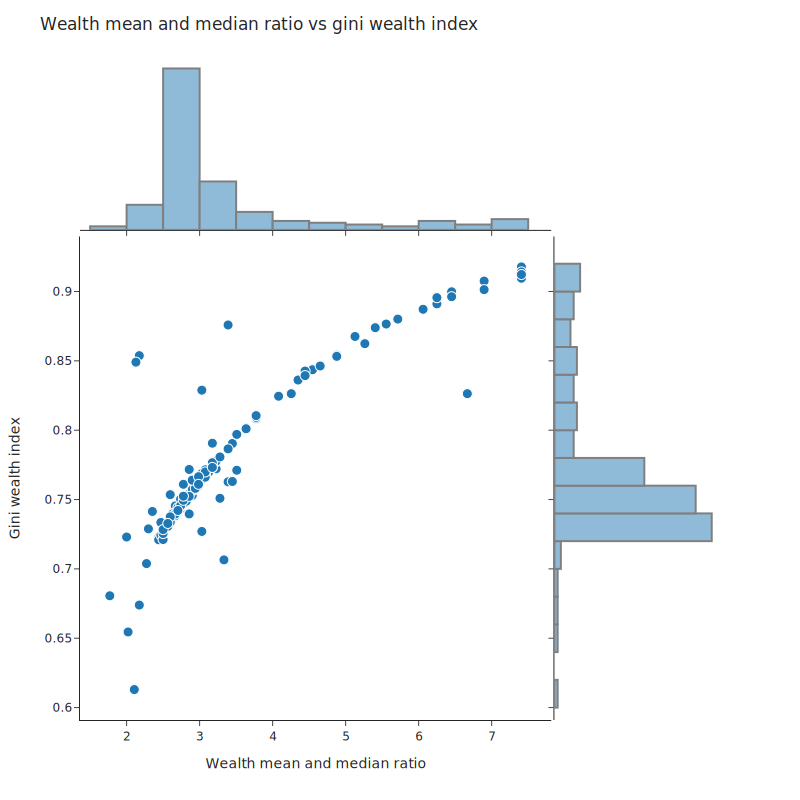

In [69]:
fig = px.scatter(data.loc[(~data.country.isin(region_col))].query('Year==2021'), x="wealth_mean_median_ratio", 
                 y="gini_wealth", hover_name="country", marginal_x='histogram', marginal_y='histogram', 
                template='simple_white', width=800, height=800)
fig.update_layout(showlegend=False, yaxis_title='Gini wealth index',xaxis_title='Wealth mean and median ratio',
                 title='Wealth mean and median ratio vs gini wealth index')
fig.update_traces(marker=dict(size=10,line=dict(width=1, color='white')), selector=dict(type='scatter'))
fig.update_traces(marker=dict(line=dict(width=2,color='black')), selector=dict(type='histogram'))

fig.show('svg')

# World

In [70]:
world = data.loc[data.country=='World']

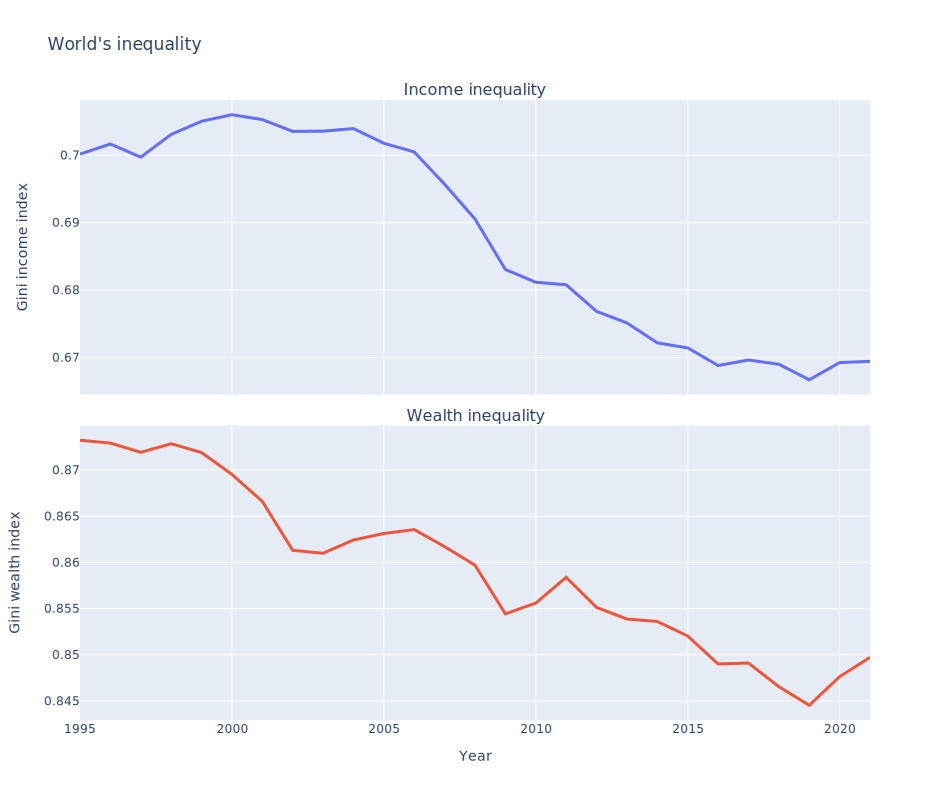

In [95]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Income inequality", "Wealth inequality"), 
                    vertical_spacing=0.05)

fig.append_trace(go.Scatter(x=world.Year, y=world.pretax_gini_income, mode='lines', line={'width':3}), row=1, col=1)
fig.update_yaxes(title_text="Gini income index", row=1, col=1)

fig.add_trace(go.Scatter(x=world.Year, y=world.gini_wealth, mode='lines', line={'width':3}), row=2, col=1)
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_yaxes(title_text="Gini wealth index", row=2, col=1)

fig.update_layout(showlegend=False,
                  template='plotly',
                  width=950, height=800,
                  title=dict(text="World's inequality"))
fig.show('svg')

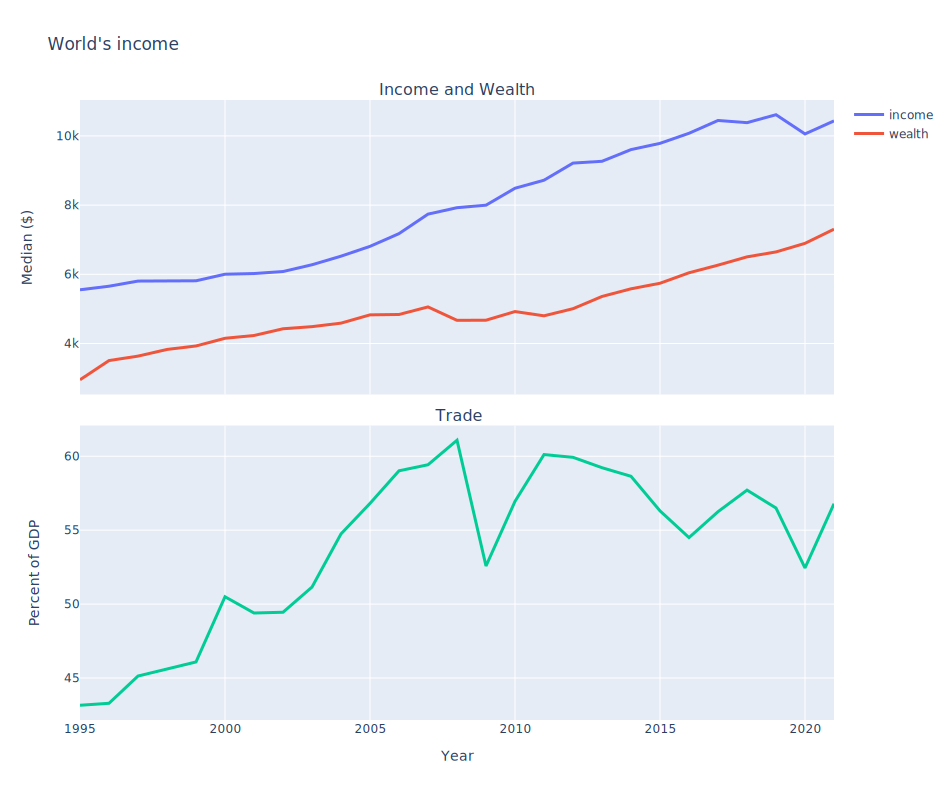

In [102]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Income and Wealth","Trade"),
                   vertical_spacing=0.05)

fig.append_trace(go.Scatter(x=world.Year, y=world.pretax_median_income, name='income', mode='lines', 
                            line={'width':3}), row=1, col=1)
fig.append_trace(go.Scatter(x=world.Year, y=world.median_wealth, name='wealth', mode='lines', 
                            line={'width':3}), row=1, col=1)
fig.update_yaxes(title_text="Median ($)", row=1, col=1)

fig.add_trace(go.Scatter(x=world.Year, y=world.trade, mode='lines', line={'width':3}, showlegend=False), row=2, col=1)
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_yaxes(title_text="Percent of GDP", row=2, col=1)

fig.update_layout(showlegend=True,
                  template='plotly',
                  width=950, height=800,
                  title=dict(text="World's income"))
fig.show('svg')

# OECD

In [99]:
oecd_members = np.array([
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Denmark',
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
    'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
    'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia',
    'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'USA'
])

In [100]:
oecd = data.loc[(data.country.isin(oecd_members))]

In [111]:
fig = px.scatter(oecd, x="pretax_gini_income", y="gini_wealth", animation_frame="Year", size='pretax_mean_income'
                 , hover_name="country", text='country',title='Wealth and Income inequality'
                ,color="country", range_x=[0.3, 0.8], range_y=[0.6, 0.95])
fig.update_layout(showlegend=False, yaxis_title='Wealth gini',xaxis_title='Income gini')
fig.update_traces(textposition='top center', textfont_size=9, selector=dict(type='scatter'))
fig.show()

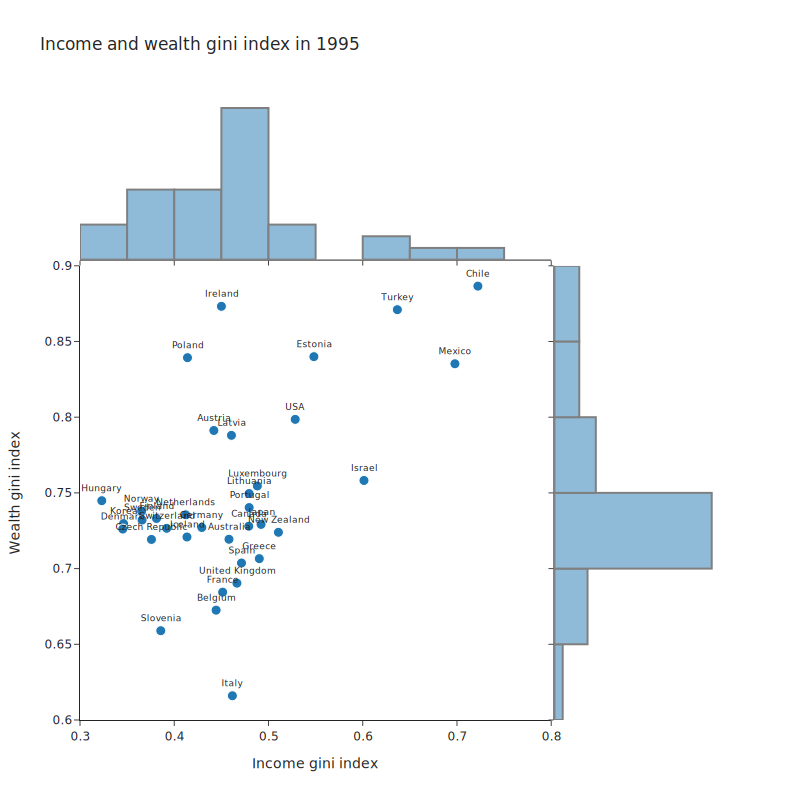

In [124]:
fig = px.scatter(oecd.query('Year==1995'), x="pretax_gini_income", y="gini_wealth", hover_name="country", text='country',
                 title='Income and wealth gini index in 1995', marginal_x='histogram', marginal_y='histogram', 
                template='simple_white', width=800, height=800, range_x=[0.3, 0.8],range_y=[0.6,0.9])
fig.update_layout(showlegend=False, yaxis_title='Wealth gini index',xaxis_title='Income gini index')
fig.update_traces(marker=dict(size=10,line=dict(width=1, color='white')), textposition='top center', textfont_size=9,selector=dict(type='scatter'))
fig.update_traces(marker=dict(line=dict(width=2,color='black')), selector=dict(type='histogram'))
fig.show('svg')

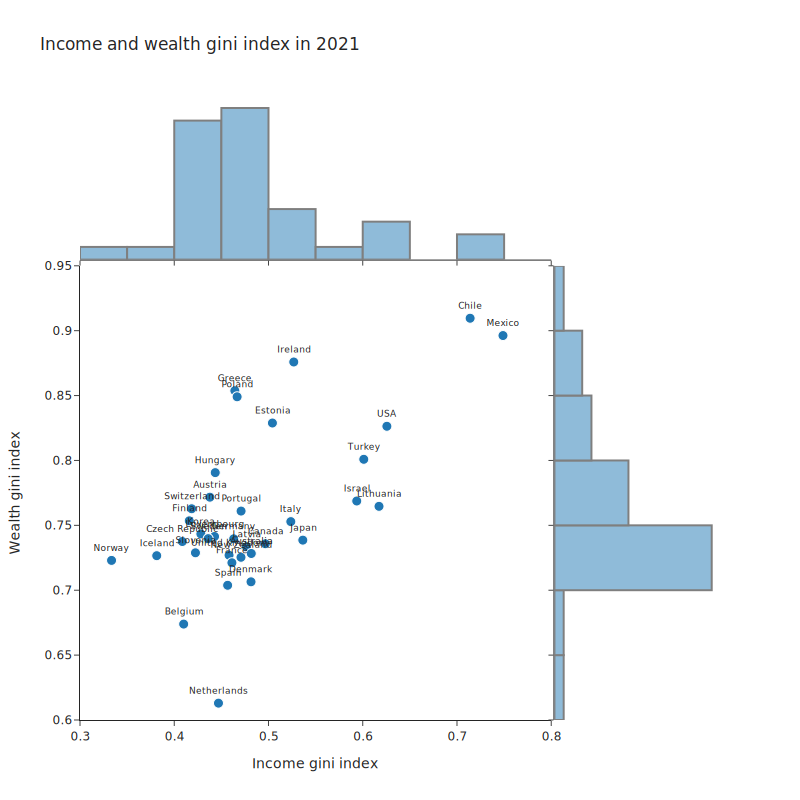

In [123]:
fig = px.scatter(oecd.query('Year==2021'), x="pretax_gini_income", y="gini_wealth", hover_name="country", text='country',
                 title='Income and wealth gini index in 2021', marginal_x='histogram', marginal_y='histogram', 
                template='simple_white', width=800, height=800, range_x=[0.3, 0.8],range_y=[0.6,0.95])
fig.update_layout(showlegend=False, yaxis_title='Wealth gini index',xaxis_title='Income gini index')
fig.update_traces(marker=dict(size=10,line=dict(width=1, color='white')), textposition='top center', textfont_size=9,selector=dict(type='scatter'))
fig.update_traces(marker=dict(line=dict(width=2,color='black')), selector=dict(type='histogram'))
fig.show('svg')

In [112]:
oecd_wealth_gini = oecd.loc[(oecd.Year==1995) | (oecd.Year==2021), ['Year', 'country','gini_wealth']]
oecd_wealth_gini = oecd_wealth_gini.pivot(index='country', columns='Year').reset_index()
oecd_wealth_gini['change'] = oecd_wealth_gini.gini_wealth[2021]-oecd_wealth_gini.gini_wealth[1995]

In [113]:
#use pretax because posttax data is incomplete
oecd_pretax_gini = oecd.loc[(oecd.Year==1995) | (oecd.Year==2021), ['Year', 'country','pretax_gini_income']]
oecd_pretax_gini = oecd_pretax_gini.pivot(index='country', columns='Year').reset_index()
oecd_pretax_gini['change'] = oecd_pretax_gini.pretax_gini_income[2021]-oecd_pretax_gini.pretax_gini_income[1995]

In [114]:
def plot_arrow(df, col_sort, col_start, col_end, col_y):
#sort individuals by amount of change, from largest to smallest
    data = df.sort_values([col_sort])

#initialize a plot
    plt.figure(figsize=(5,10))

#add start points
    sns.stripplot(data=data, 
                   x=col_start, 
                   y=col_y, 
                   orient='h', 
                   order=data[col_y], 
                   size=5, 
                   color='black')

#define arrows
    arrow_starts = data[col_start].values
    arrow_lengths = data[col_end].values - arrow_starts

#add arrows to plot
    for i, country in enumerate(data[col_y]):
        if arrow_lengths[i] > 0:
            arrow_color = 'red'
        else:
            arrow_color = 'green'
        plt.arrow(arrow_starts[i],        #x start point
             i,                      #y start point
             arrow_lengths[i],       #change in x 
             0,                      #change in y
             head_width=0.4,         #arrow head width
             head_length=0.01,        #arrow head length
             width=0.1,              #arrow stem width
             fc=arrow_color,             #arrow fill color
             ec=arrow_color)             #arrow edge color

In [115]:
def plot_arrow_change(df, col_sort, col_start, col_end, col_y, figsize=(5,10)):
#sort individuals by amount of change, from largest to smallest
    data = df.sort_values([col_sort])

#initialize a plot
    plt.figure(figsize=figsize)

#add start points
    sns.stripplot(data=data, 
                   x=col_sort, 
                   y=col_y, 
                   orient='h', 
                   order=data[col_y], 
                   size=0, 
                   color='black')

#define arrows
    arrow_starts = data[col_start].values
    arrow_starts_2 = np.repeat(0, data.shape[0])
    arrow_lengths = data[col_end].values - arrow_starts

#add arrows to plot
    for i, country in enumerate(data[col_y]):
        if arrow_lengths[i] > 0:
            arrow_color = 'red'
        else:
            arrow_color = 'green'
        plt.arrow(arrow_starts_2[i],        #x start point
             i,                      #y start point
             arrow_lengths[i],       #change in x 
             0,                      #change in y
             head_width=0.4,         #arrow head width
             head_length=0.01,        #arrow head length
             width=0.1,              #arrow stem width
             fc=arrow_color,             #arrow fill color
             ec=arrow_color)             #arrow edge color
    plt.axvline(x=0, ls='--', lw=2, c='k')

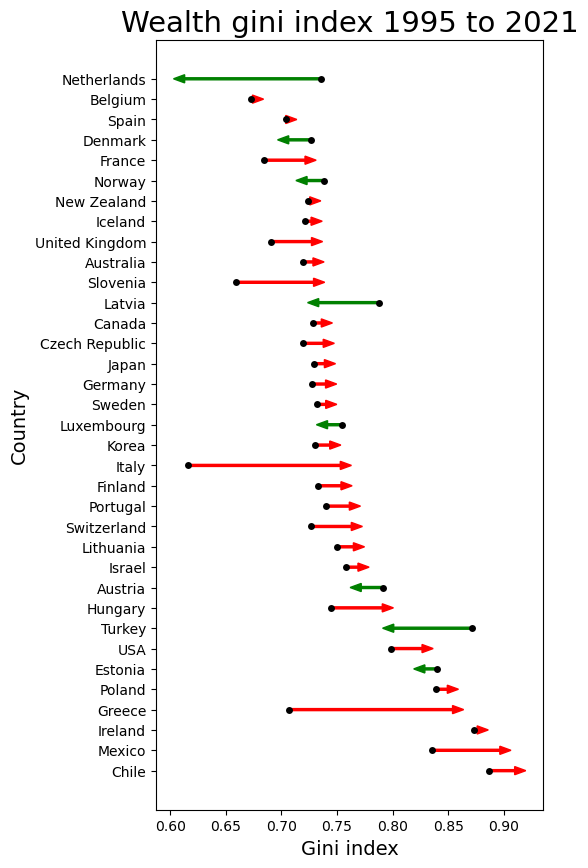

In [116]:
plot_arrow(oecd_wealth_gini, ('gini_wealth', 2021), ('gini_wealth', 1995), ('gini_wealth', 2021), 'country')
plt.title('Wealth gini index 1995 to 2021', fontsize=21)
plt.xlabel('Gini index', fontsize=14) 
plt.ylabel('Country', fontsize=14) 
plt.show()

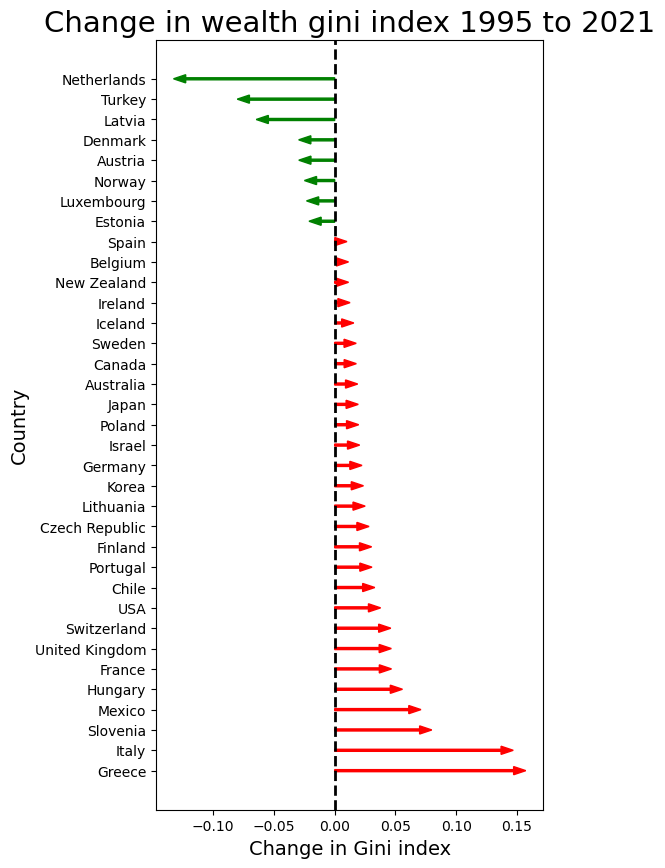

In [117]:
plot_arrow_change(oecd_wealth_gini, 'change', ('gini_wealth', 1995), ('gini_wealth', 2021), 'country')
plt.title('Change in wealth gini index 1995 to 2021', fontsize=21)
plt.xlabel('Change in Gini index', fontsize=14) 
plt.ylabel('Country', fontsize=14) 
plt.show()

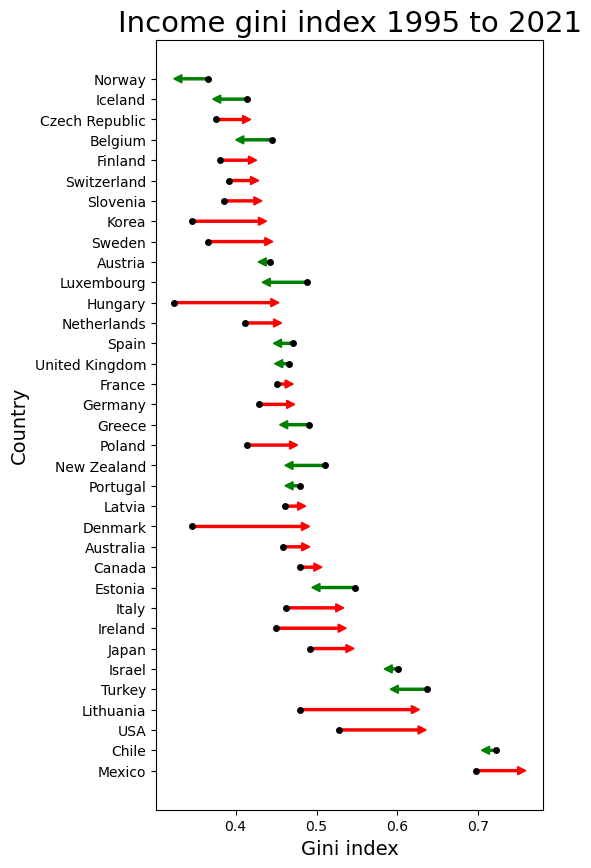

In [118]:
plot_arrow(oecd_pretax_gini, ('pretax_gini_income', 2021), ('pretax_gini_income', 1995), ('pretax_gini_income', 2021), 'country')
plt.title('Income gini index 1995 to 2021', fontsize=21)
plt.xlabel('Gini index', fontsize=14) 
plt.ylabel('Country', fontsize=14) 
plt.show()

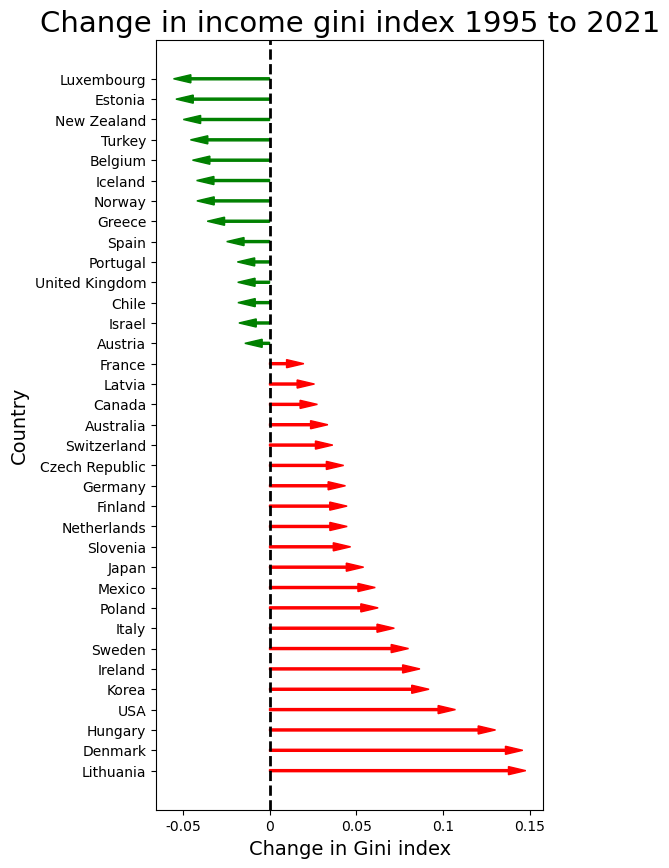

In [119]:
plot_arrow_change(oecd_pretax_gini, 'change', ('pretax_gini_income', 1995), ('pretax_gini_income', 2021), 'country')
plt.title('Change in income gini index 1995 to 2021', fontsize=21)
plt.xlabel('Change in Gini index', fontsize=14) 
plt.ylabel('Country', fontsize=14) 
plt.xticks([-0.05, 0, 0.05, 0.1, 0.15], [-0.05, 0, 0.05, 0.1, 0.15])
plt.show()

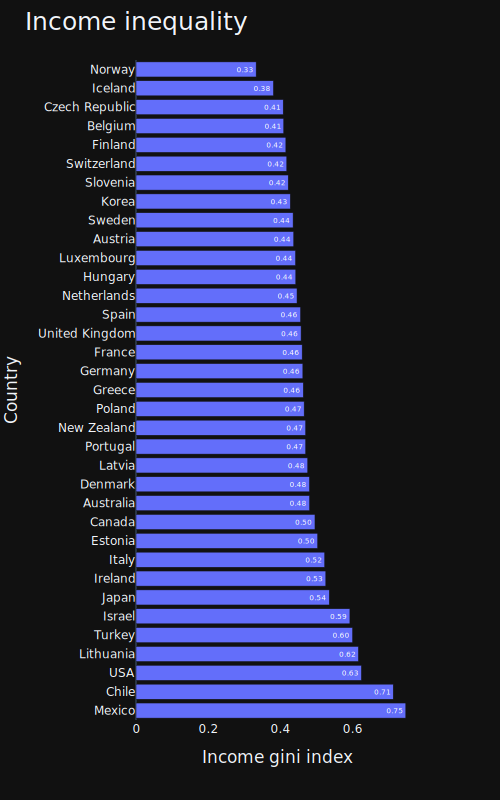

In [128]:
fig = px.bar(oecd.loc[oecd.Year==2021].sort_values('pretax_gini_income', ascending=False), x='pretax_gini_income', 
             y='country', text_auto = '.2f')
fig.update_layout(width=500, height=800,template='plotly_dark',
                  title=dict(text='Income inequality', font=dict(size=25)),
                  xaxis_title=dict(text='Income gini index', font=dict(size=17)),
                  yaxis = dict(tickfont = dict(size=12)),
                  yaxis_title=dict(text='Country', font=dict(size=17)),
                  xaxis = dict(tickfont = dict(size=12)))
fig.update_xaxes(showgrid=False)
fig.show('svg')

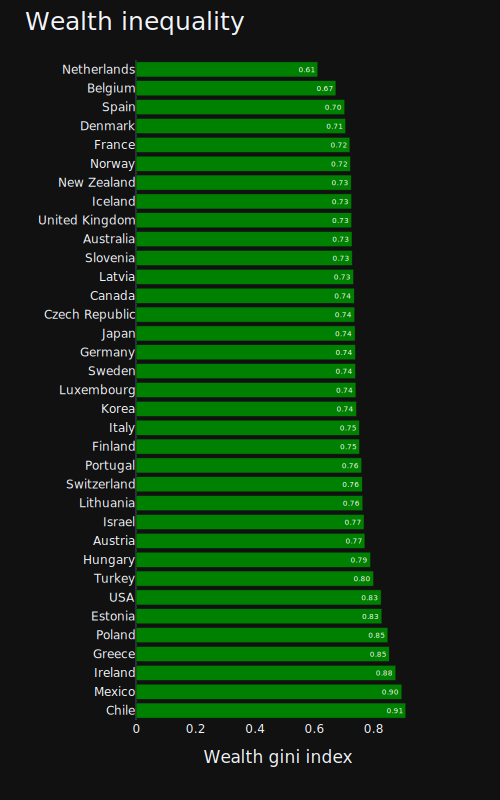

In [130]:
fig = px.bar(oecd.loc[oecd.Year==2021].sort_values('gini_wealth', ascending=False), x='gini_wealth', y='country', 
             text_auto = '.2f')
fig.update_traces(marker=dict(color='green'))
fig.update_layout(width=500, height=800,template='plotly_dark',
                  title=dict(text='Wealth inequality', font=dict(size=25)),
                  xaxis_title=dict(text='Wealth gini index', font=dict(size=17)),
                  yaxis = dict(tickfont = dict(size=12)),
                  yaxis_title=dict(text='', font=dict(size=17)),
                  xaxis = dict(tickfont = dict(size=12)))
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showticklabels=False) # Hide y axis ticks
fig.show('svg')

# Top 10 highest GDP

In [131]:
top_gdp_country = ['USA', 'Mexico', 'Germany', 'Japan', 'India', 'United Kingdom', 'France', 'Italy', 'Brazil', 'Canada', 
                   'China', 'Russian Federation']

In [132]:
total_gdp = prepdata('WID_Data_GDP', 'GDP')

In [133]:
total_gdp

,Year,country,GDP
0,2021,Brazil,4.001323e+12
1,2021,Canada,2.118742e+12
2,2021,China,3.632427e+13
3,2021,France,3.505248e+12
4,2021,Germany,5.011450e+12
5,2021,India,1.144179e+13
6,2021,Italy,2.816605e+12
7,2021,Japan,5.773555e+12
8,2021,Mexico,2.869456e+12
9,2021,Russian Federation,4.754251e+12


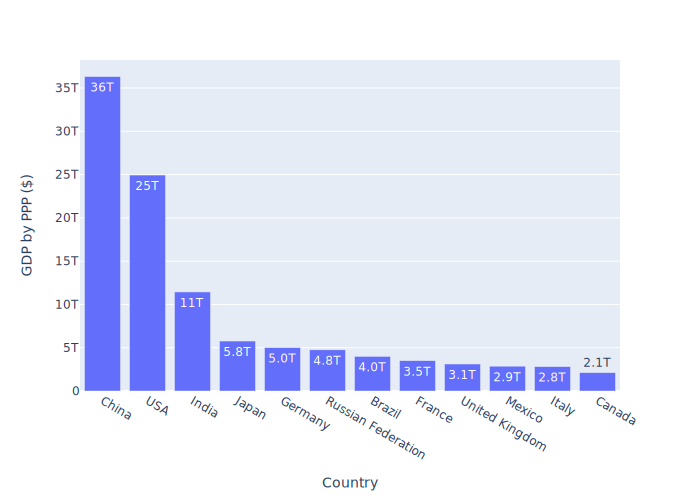

In [134]:
fig = px.bar(total_gdp.sort_values('GDP', ascending=False), x='country', y='GDP', text_auto='.2s')
fig.update_layout(yaxis_title='GDP by PPP ($)',xaxis_title='Country', template='plotly')
fig.show('svg')

In [135]:
gdp = data.loc[(data.country.isin(top_gdp_country))]

In [136]:
fig = px.scatter(gdp, x="pretax_gini_income", y="gini_wealth", animation_frame="Year", size='pretax_mean_income'
                 , hover_name="country", text='country',title='Wealth and Income inequality'
                ,color="country",range_x=[0.4,0.8], range_y=[0.6,0.95])
fig.update_traces(textposition='top center', textfont_size=9, selector=dict(type='scatter'))
fig.update_layout(showlegend=False, yaxis_title='Wealth gini',xaxis_title='Income gini', template='plotly_white')
fig.show()

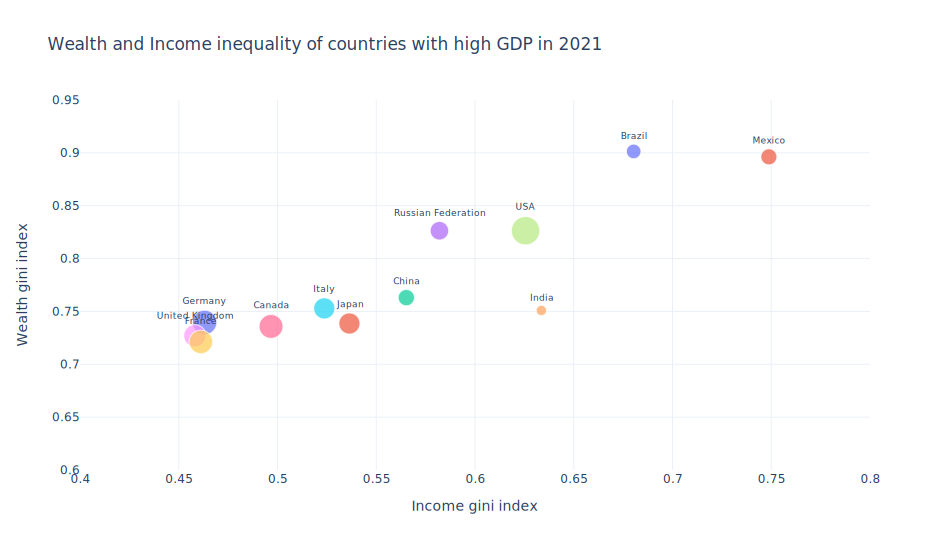

In [142]:
fig = px.scatter(gdp.query('Year==2021'), x="pretax_gini_income", y="gini_wealth", size='pretax_mean_income'
                 , hover_name="country", text='country',title='Wealth and Income inequality of countries with high GDP in 2021'
                ,color="country",range_x=[0.4,0.8], range_y=[0.6,0.95])
fig.update_traces(textposition='top center', textfont_size=9, selector=dict(type='scatter'))
fig.update_layout(showlegend=False, yaxis_title='Wealth gini index',xaxis_title='Income gini index', 
                  template='plotly_white', width=950, height=550)
fig.show('svg')

In [138]:
gdp_pretax_gini = gdp.loc[(gdp.Year==1995) | (gdp.Year==2021), ['Year', 'country','pretax_gini_income']]
gdp_pretax_gini = gdp_pretax_gini.pivot(index='country', columns='Year').reset_index()
gdp_pretax_gini['change'] = gdp_pretax_gini.pretax_gini_income[2021]-gdp_pretax_gini.pretax_gini_income[1995]

In [139]:
gdp_wealth_gini = gdp.loc[(gdp.Year==1995) | (gdp.Year==2021), ['Year', 'country','gini_wealth']]
gdp_wealth_gini = gdp_wealth_gini.pivot(index='country', columns='Year').reset_index()
gdp_wealth_gini['change'] = gdp_wealth_gini.gini_wealth[2021]-gdp_wealth_gini.gini_wealth[1995]

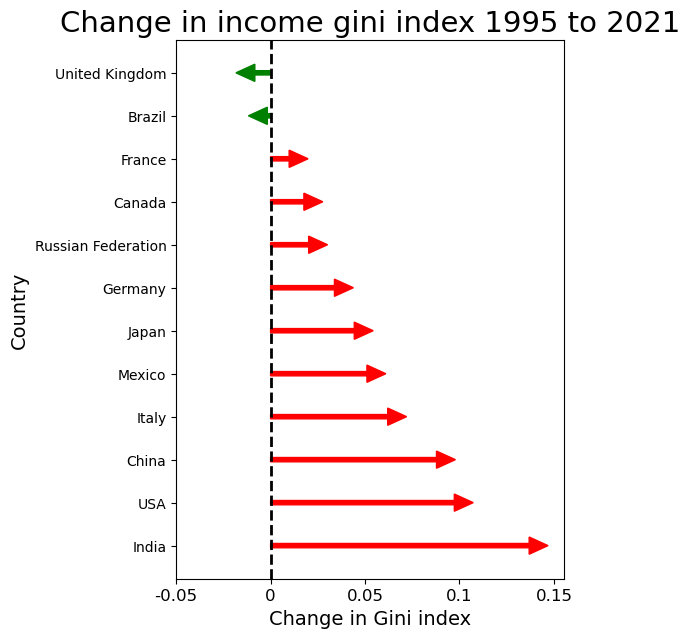

In [140]:
plot_arrow_change(gdp_pretax_gini, 'change', ('pretax_gini_income', 1995), ('pretax_gini_income', 2021), 'country', (5,7))
plt.title('Change in income gini index 1995 to 2021', fontsize=21)
plt.xlabel('Change in Gini index', fontsize=14) 
plt.ylabel('Country', fontsize=14) 
plt.xticks([-0.05, 0, 0.05, 0.1, 0.15], [-0.05, 0, 0.05, 0.1, 0.15], fontsize=12)
plt.show()

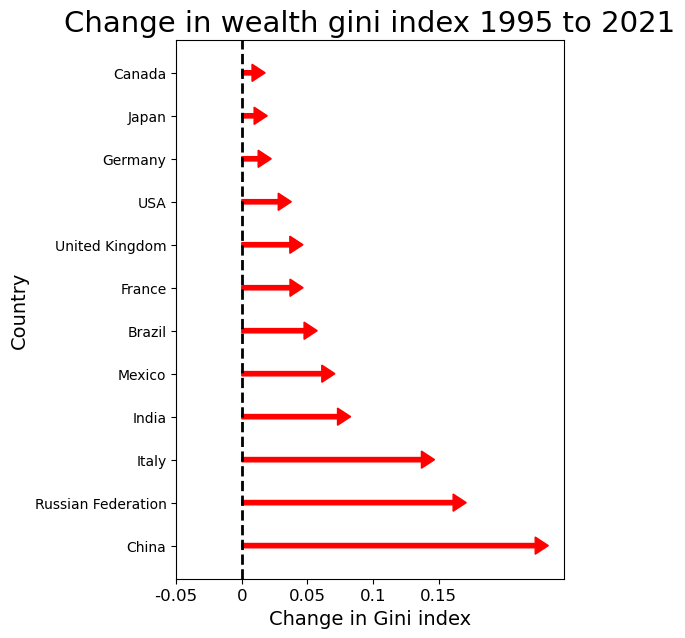

In [143]:
plot_arrow_change(gdp_wealth_gini, 'change', ('gini_wealth', 1995), ('gini_wealth', 2021), 'country', (5,7))
plt.title('Change in wealth gini index 1995 to 2021', fontsize=21)
plt.xlabel('Change in Gini index', fontsize=14) 
plt.ylabel('Country', fontsize=14) 
plt.xticks([-0.05, 0, 0.05, 0.1, 0.15], [-0.05, 0, 0.05, 0.1, 0.15], fontsize=12)
plt.show()

# All countries

In [144]:
countries = data.loc[(~data.country.isin(region_col))]

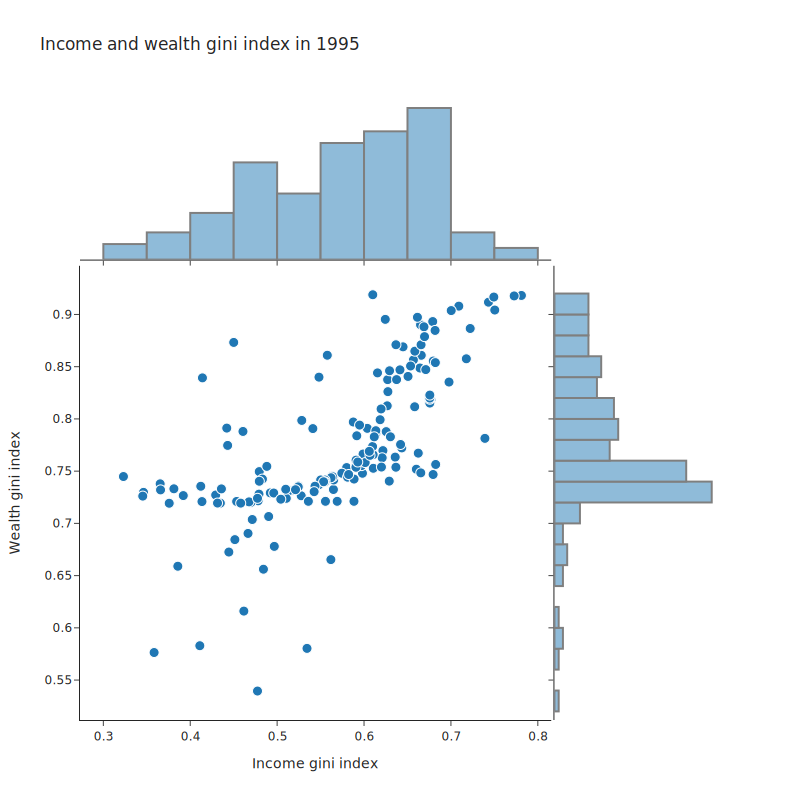

In [146]:
fig = px.scatter(countries.query('Year==1995'), x="pretax_gini_income", y="gini_wealth", hover_name="country",
                 title='Income and wealth gini index in 1995', marginal_x='histogram', marginal_y='histogram', 
                template='simple_white', width=800, height=800)
fig.update_layout(showlegend=False, yaxis_title='Wealth gini index',xaxis_title='Income gini index')
fig.update_traces(marker=dict(size=10,line=dict(width=1, color='white')),selector=dict(type='scatter'))
fig.update_traces(marker=dict(line=dict(width=2,color='black')), selector=dict(type='histogram'))
fig.show('svg')

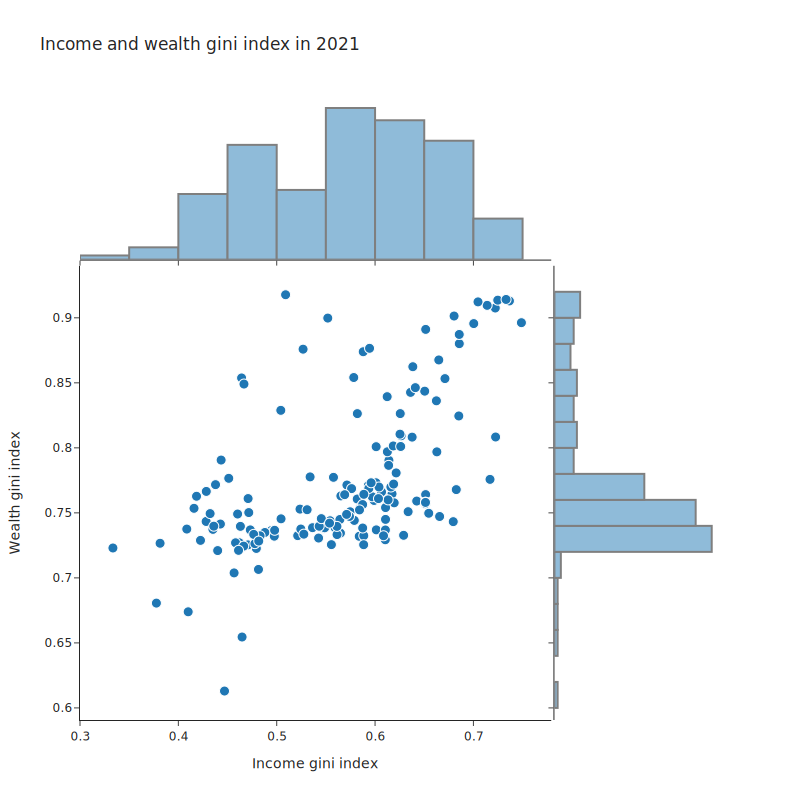

In [148]:
fig = px.scatter(countries.query('Year==2021'), x="pretax_gini_income", y="gini_wealth", hover_name="country",
                 title='Income and wealth gini index in 2021', marginal_x='histogram', marginal_y='histogram', 
                template='simple_white', width=800, height=800)
fig.update_layout(showlegend=False, yaxis_title='Wealth gini index',xaxis_title='Income gini index')
fig.update_traces(marker=dict(size=10,line=dict(width=1, color='white')),selector=dict(type='scatter'))
fig.update_traces(marker=dict(line=dict(width=2,color='black')), selector=dict(type='histogram'))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show('svg')

# G7

In [150]:
g7_top10_income = prepdata('WID_Data_Top10_income', 'top10_income')

In [151]:
g7_top10_wealth = prepdata('WID_Data_Top10_wealth', 'top10_wealth')

In [152]:
g7_top1_income = prepdata('WID_Data_Top1_income', 'top1_income')
g7_top1_wealth = prepdata('WID_Data_Top1_wealth', 'top1_wealth')
g7_bottom50_income = prepdata('WID_Data_Bottom50_income', 'bottom50_income')
g7_bottom50_wealth = prepdata('WID_Data_Bottom50_wealth', 'bottom50_wealth')

In [153]:
g7_top10 = g7_top10_income.merge(g7_top10_wealth, on=['Year', 'country'])

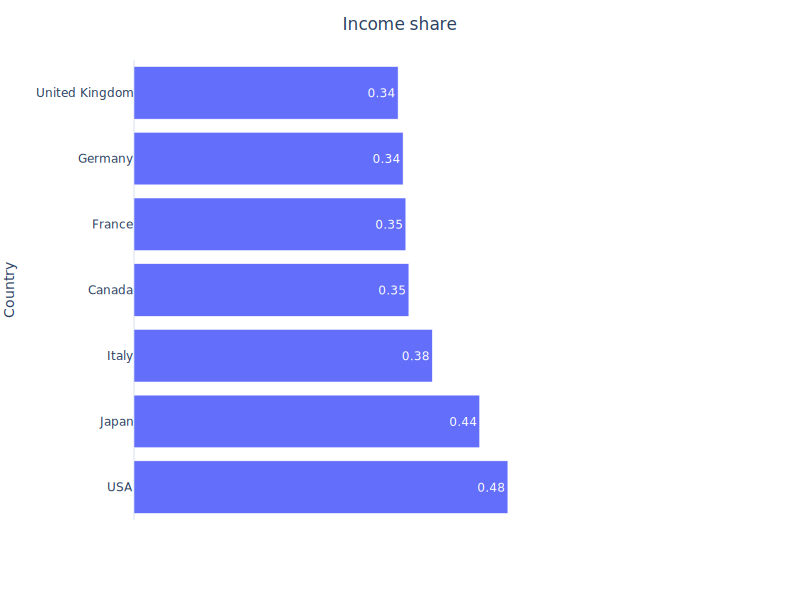

In [155]:
fig = px.bar(g7_top10.query('Year==2021').sort_values('top10_income', ascending=False), x='top10_income', 
             y='country', text_auto='.2', range_x=[0,0.75])
fig.update_layout(yaxis_title='Country',xaxis_title='', template='plotly_white', 
                  title={'text': "Income share", 'x':0.5}, width=800, height=600)
fig.update_xaxes(showgrid=False)
fig.update_xaxes(showticklabels=False)
fig.show('svg')

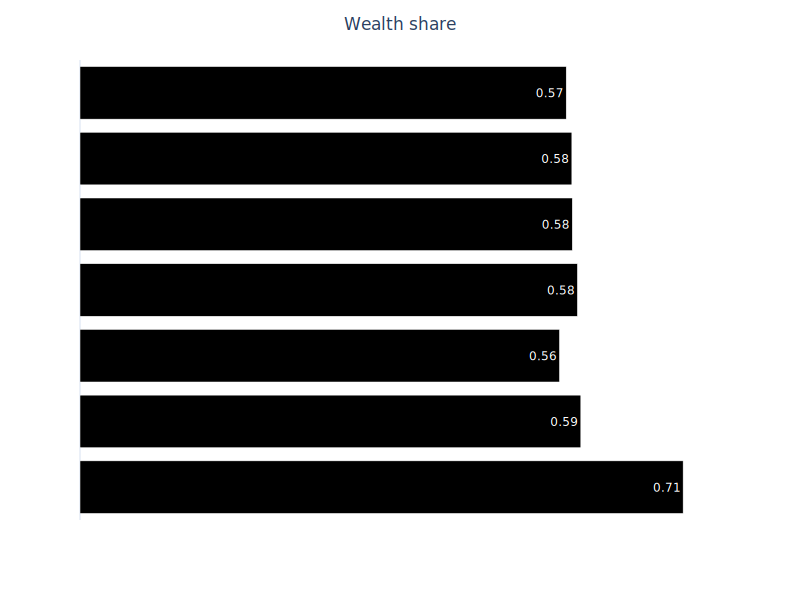

In [156]:
fig = px.bar(g7_top10.query('Year==2021').sort_values('top10_income', ascending=False), x='top10_wealth', 
             y='country', text_auto='.2', range_x=[0,0.75])
fig.update_traces(marker=dict(color='black'))
fig.update_layout(yaxis_title='',xaxis_title='', template='plotly_white', 
                  title={'text': "Wealth share", 'x':0.5}, width=800, height=600)
fig.update_xaxes(showgrid=False)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show('svg')

In [157]:
us_top1_income = g7_top1_income.query('country=="USA"')
us_bottom50_income = g7_bottom50_income.query('country=="USA"')
us_top1_wealth = g7_top1_wealth.query('country=="USA"')
us_bottom50_wealth = g7_bottom50_wealth.query('country=="USA"')

In [158]:
g7_avg_top1_income = g7_top1_income.groupby('Year', as_index=False).top1_income.mean()
g7_avg_bottom50_income = g7_bottom50_income.groupby('Year', as_index=False).bottom50_income.mean()
g7_avg_top1_wealth = g7_top1_wealth.groupby('Year', as_index=False).top1_wealth.mean()
g7_avg_bottom50_wealth = g7_bottom50_wealth.groupby('Year', as_index=False).bottom50_wealth.mean()

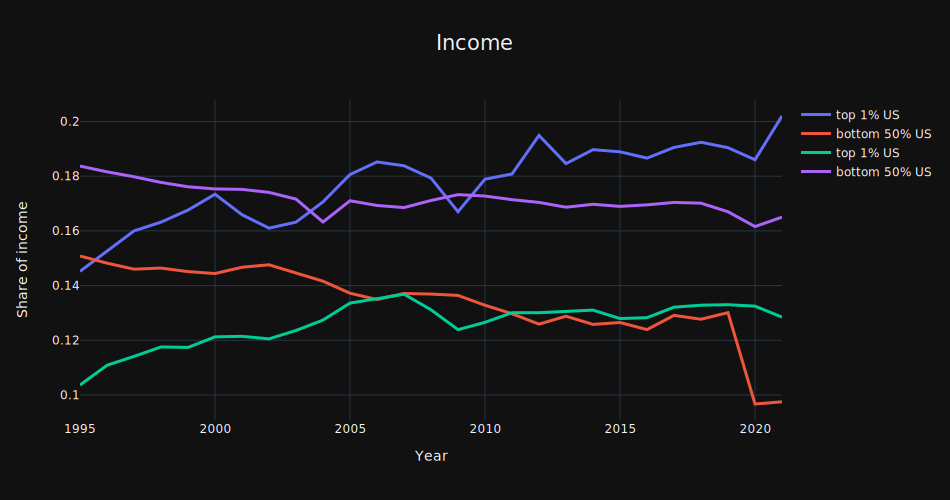

In [162]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=us_top1_income.Year, y=us_top1_income.top1_income, line={'width': 3}, name='top 1% US'))
fig.add_trace(go.Scatter(x=us_bottom50_income.Year, y=us_bottom50_income.bottom50_income, line={'width': 3}, name='bottom 50% US'))
fig.add_trace(go.Scatter(x=g7_avg_top1_income.Year, y=g7_avg_top1_income.top1_income, line={'width': 3}, name='top 1% US'))
fig.add_trace(go.Scatter(x=g7_avg_top1_income.Year, y=g7_avg_bottom50_income.bottom50_income, line={'width': 3}, name='bottom 50% US'))
fig.update_layout(yaxis_title={'text':'Share of income'},
                  xaxis_title='Year', 
                  #yaxis = dict(tickfont = dict(size=12)),
                  #yaxis_title=dict(text='', font=dict(size=17))
                  template='plotly_dark', 
                  title={'text': "Income", 'x':0.5, 'font':{'size':21}},
                 width=950, height=500)
#fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)
fig.show('svg')

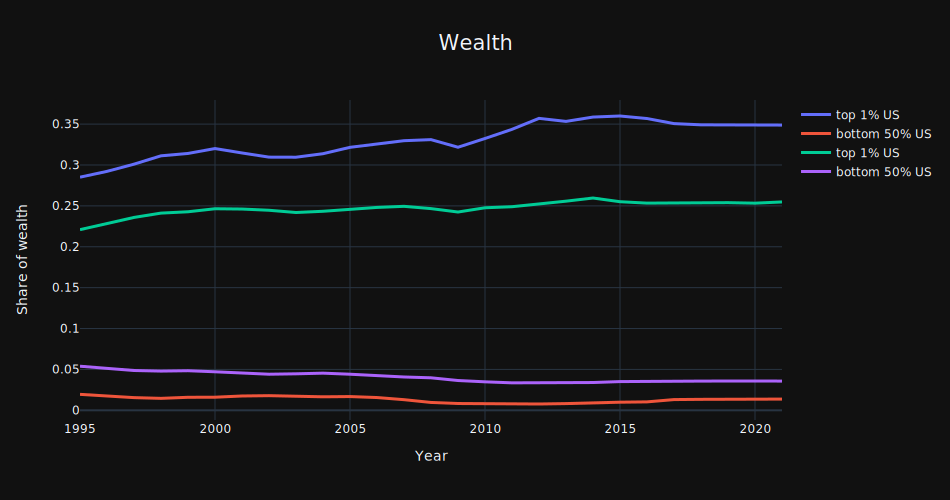

In [164]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=us_top1_wealth.Year, y=us_top1_wealth.top1_wealth, line={'width': 3}, name='top 1% US'))
fig.add_trace(go.Scatter(x=us_bottom50_wealth.Year, y=us_bottom50_wealth.bottom50_wealth, line={'width': 3}, name='bottom 50% US'))
fig.add_trace(go.Scatter(x=g7_avg_top1_wealth.Year, y=g7_avg_top1_wealth.top1_wealth, line={'width': 3}, name='top 1% US'))
fig.add_trace(go.Scatter(x=g7_avg_top1_wealth.Year, y=g7_avg_bottom50_wealth.bottom50_wealth, line={'width': 3}, name='bottom 50% US'))
fig.update_layout(yaxis_title={'text':'Share of wealth'},
                  xaxis_title='Year', 
                  #yaxis = dict(tickfont = dict(size=12)),
                  #yaxis_title=dict(text='', font=dict(size=17))
                  template='plotly_dark', 
                  title={'text': "Wealth", 'x':0.5, 'font':{'size':21}},
                 width=950, height=500)
#fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)
fig.show('svg')

In [165]:
g7_countries = ['United States', 'Germany', 'Japan', 'United Kingdom', 'France', 'Italy', 'Canada'] 

In [166]:
world_trade = world.trade/world.trade.min()-1
g7_avg_top1_income_rel = g7_avg_top1_income.top1_income/g7_avg_top1_income.top1_income.min()-1
us_top1_income_rel = us_top1_income.top1_income/us_top1_income.top1_income.min()-1

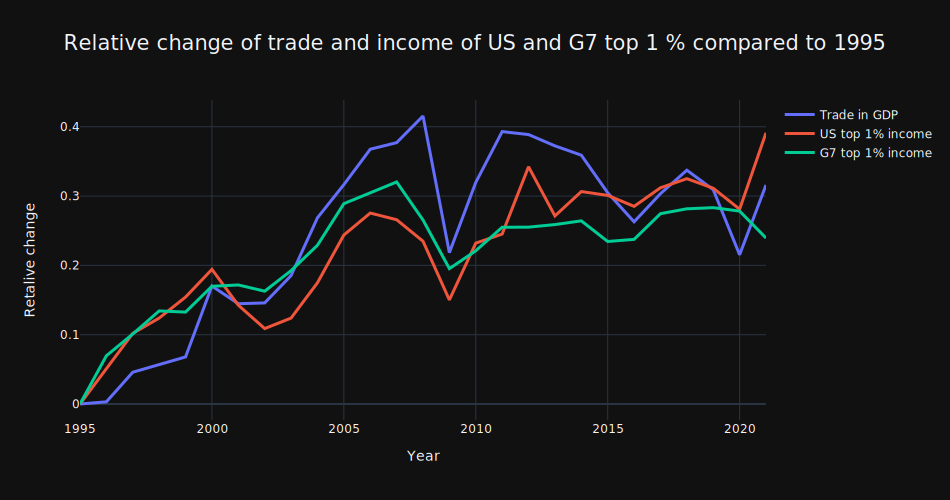

In [170]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1995, 2022), y=world_trade, line={'width': 3}, name='Trade in GDP'))
fig.add_trace(go.Scatter(x=np.arange(1995, 2022), y=us_top1_income_rel, line={'width': 3}, name='US top 1% income'))
fig.add_trace(go.Scatter(x=np.arange(1995, 2022), y=g7_avg_top1_income_rel, line={'width': 3}, name='G7 top 1% income'))
fig.update_layout(yaxis_title={'text':'Retalive change'},
                  xaxis_title='Year', 
                  template='plotly_dark', 
                  title={'text': "Relative change of trade and income of US and G7 top 1 % compared to 1995", 
                         'x':0.5, 'font':{'size':21}}, width=950, height=500)

fig.show('svg')

# Tax

In [171]:
tax = pd.read_csv('../data/raw/Tax.csv')
tax = tax.loc[tax.Country.isin(g7_countries)]
tax_rate = tax.loc[tax['Income Tax']=='Top tax rates']
tax_rate.query('Year==2022')

,COU,Country,TAX,Income Tax,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
574,GBR,United Kingdom,TOP_TRATE,Top tax rates,2022,2022,PC,Percentage,0,Units,NaN,NaN,45.0000,NaN,NaN
827,JPN,Japan,TOP_TRATE,Top tax rates,2022,2022,PC,Percentage,0,Units,NaN,NaN,55.9450,NaN,NaN
1540,ITA,Italy,TOP_TRATE,Top tax rates,2022,2022,PC,Percentage,0,Units,NaN,NaN,47.2300,NaN,NaN
3035,DEU,Germany,TOP_TRATE,Top tax rates,2022,2022,PC,Percentage,0,Units,NaN,NaN,47.4750,NaN,NaN
3334,CAN,Canada,TOP_TRATE,Top tax rates,2022,2022,PC,Percentage,0,Units,NaN,NaN,53.5296,NaN,NaN
3518,USA,United States,TOP_TRATE,Top tax rates,2022,2022,PC,Percentage,0,Units,NaN,NaN,43.6500,NaN,NaN
3840,FRA,France,TOP_TRATE,Top tax rates,2022,2022,PC,Percentage,0,Units,NaN,NaN,55.3680,NaN,NaN


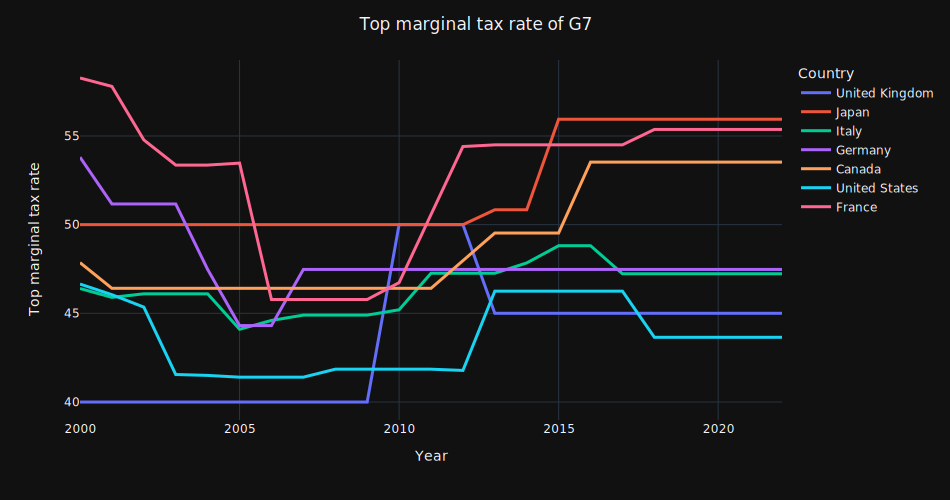

In [173]:
fig = px.line(tax_rate, x='Year', y='Value', color='Country')
fig.update_traces(line={'width': 3})
fig.update_layout(yaxis_title='Top marginal tax rate',xaxis_title='Year', template='plotly_dark', 
                  title={'text': "Top marginal tax rate of G7", 'x':0.5}, width=950, height=500)
fig.show('svg')

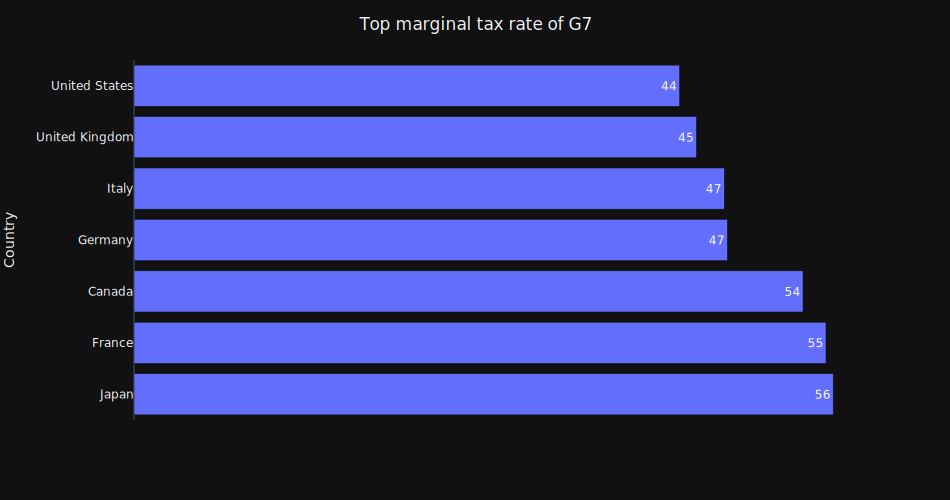

In [177]:
fig = px.bar(tax_rate.query('Year==2022').sort_values('Value', ascending=False), x='Value', 
             y='Country', text_auto='.2')
fig.update_layout(yaxis_title='Country',xaxis_title='', template='plotly_dark', 
                  title={'text': "Top marginal tax rate of G7", 'x':0.5}, width=950, height=500)
fig.update_xaxes(showgrid=False)
fig.update_xaxes(showticklabels=False)
fig.show('svg')